In [198]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.decomposition import PCA

In [266]:
projects = pd.read_csv('projects_with_text.csv')

In [267]:
projects.head()

,_projectid,_teacher_acctid,_schoolid,school_ncesid,school_latitude,school_longitude,school_city,school_state,school_zip,school_metro,...,total_donations,num_donors,eligible_double_your_impact_match,eligible_almost_home_match,funding_status,date_posted,date_completed,date_thank_you_packet_mailed,date_expiration,essay
0,f72fea86e94f406b87628178503ff464,afba180e88c15b82b55c744d02bf8901,158a130ba5089510f810408029f68423,2.513230e+11,42.272407,-71.788095,Worcester,MA,1605,urban,...,10,1,f,f,expired,2015-08-17,NaN,NaN,2015-12-10,My classroom is a space where the students and...
1,a59bb8248f763dfd5c504f6fa1f459a2,b2a1a7921f97f1bf76d43433614e986d,17e8a720f2071ce287a2eaf619dcdd54,6.180300e+10,33.668713,-117.959404,Huntingtn Beach,CA,92646,suburban,...,478,1,f,f,completed,2011-11-13,2011-12-02,2012-01-02,2012-04-11,"\""There's no fire drill!\"" That's what one stu..."
2,0df664d7eefd7526b56cfea8b9a86546,4121836a4746a7ded4749124caeaa514,64c0243b8a8f0b10e420aa2ae5883f75,3.704950e+11,36.137175,-81.107709,N Wilkesboro,NC,28659,rural,...,0,0,f,f,expired,2006-11-28,NaN,NaN,2007-07-28,I am an Elementary Special Education Resource ...
3,f7f13e583bfc0e7a5a6963f72c530f28,88c38577dfa34b5a7329c18cb8f439fd,60c73d25e789e11f55f084d918ff1b8a,3.700690e+11,35.578108,-81.212266,Maiden,NC,28650,NaN,...,1,1,t,f,expired,2011-01-07,NaN,NaN,2011-06-05,I love great books and I want to instill that ...
4,a36f288f2a883843a7453fe4895a4825,b7276b6e133b447916507ab94a536f12,beb8215d15cd3b25a252953d94792dbf,2.400090e+11,39.324516,-76.573269,Baltimore,MD,21213,urban,...,337,4,t,f,completed,2015-10-17,2015-12-12,2016-06-13,2016-02-11,Math is often the subject that students strugg...


In [268]:
text_feats = pd.read_csv("text_feats.csv")

In [269]:
text_feats.head()

,Unnamed: 0,_projectid,anger,anticipation,disgust,fear,joy,negative,positive,sadness,...,success,successful,supplies,teach,teacher,technology,time,title,wonderful,working
0,1,f72fea86e94f406b87628178503ff464,0.0,5.0,0.0,0.0,6.0,0.0,12.0,0.0,...,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000
1,2,a59bb8248f763dfd5c504f6fa1f459a2,0.0,4.0,0.0,0.0,3.0,0.0,8.0,0.0,...,0.0,0.0,0.203147,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000
2,3,0df664d7eefd7526b56cfea8b9a86546,0.0,2.0,0.0,0.0,6.0,1.0,17.0,0.0,...,0.0,0.0,0.000000,0.106057,0.074889,0.0,0.0,0.0,0.000000,0.000000
3,4,f7f13e583bfc0e7a5a6963f72c530f28,0.0,2.0,0.0,0.0,7.0,1.0,10.0,0.0,...,0.0,0.0,0.000000,0.083961,0.118574,0.0,0.0,0.0,0.177303,0.000000
4,5,a36f288f2a883843a7453fe4895a4825,0.0,1.0,0.0,0.0,1.0,0.0,8.0,0.0,...,0.0,0.0,0.000000,0.000000,0.109453,0.0,0.0,0.0,0.000000,0.127256


In [270]:
len(text_feats.columns.values)

64

In [271]:
projects.funding_status.value_counts()

completed      25000
expired        21736
live            2649
reallocated      615
Name: funding_status, dtype: int64

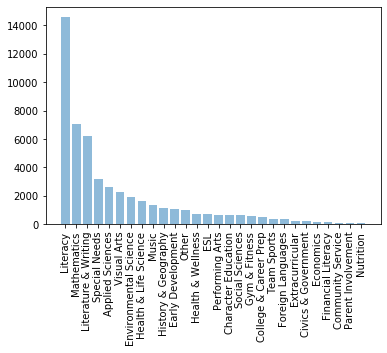

In [272]:
a = pd.DataFrame(projects.primary_focus_subject.value_counts())
plt.bar( a.index,a.primary_focus_subject, align='center', alpha=0.5)
plt.xticks(a.index, rotation = 90)
#plt.ylabel('Usage')
#plt.title('Programming language usage')
#
plt.show()

In [273]:
projects['Essay_length'] = [len(x.split()) for x in projects.essay]

In [274]:
projects.describe()

,school_ncesid,school_latitude,school_longitude,school_zip,vendor_shipping_charges,sales_tax,payment_processing_charges,fulfillment_labor_materials,total_price_excluding_optional_support,total_price_including_optional_support,students_reached,total_donations,num_donors,Essay_length
count,4.706800e+04,50000.000000,50000.000000,50000.000000,48417.000000,48417.000000,48417.000000,48417.000000,50000.000000,50000.000000,49991.000000,50000.000000,50000.000000,50000.000000
mean,2.622612e+11,37.102606,-93.414177,53189.299080,15.945731,20.379358,8.892821,28.505793,638.023000,754.636429,93.389110,326.259520,3.553300,296.902020
std,1.607141e+11,4.831835,17.545060,30758.009668,40.782896,46.691554,13.759568,6.677431,913.608273,1079.855505,156.452351,590.259528,5.535794,88.524544
min,1.000050e+10,18.249140,-163.953391,1013.000000,0.000000,-128.300000,0.000000,9.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000
25%,1.200090e+11,33.934803,-111.883347,28209.000000,0.000000,0.000000,3.970000,30.000000,300.707500,356.355000,22.000000,4.000000,1.000000,229.000000
50%,2.612000e+11,37.369357,-87.690902,49735.000000,0.000000,0.000000,5.950000,30.000000,442.540000,524.735000,30.000000,195.000000,2.000000,284.000000
75%,3.904901e+11,40.742988,-80.065837,84321.000000,20.900000,27.590000,10.040000,30.000000,721.640000,853.930000,100.000000,466.000000,5.000000,355.000000
max,5.606090e+11,64.890549,-66.628036,99950.000000,2546.110000,2622.810000,961.580000,35.000000,65096.580000,76584.210000,5000.000000,47444.000000,197.000000,1263.000000


In [275]:
projects.Essay_length

0        292
1        319
2        244
3        290
4        236
        ... 
49995    258
49996    194
49997    292
49998    220
49999    344
Name: Essay_length, Length: 50000, dtype: int64

In [276]:
projects.columns.values

array(['_projectid', '_teacher_acctid', '_schoolid', 'school_ncesid',
       'school_latitude', 'school_longitude', 'school_city',
       'school_state', 'school_zip', 'school_metro', 'school_district',
       'school_county', 'school_charter', 'school_magnet',
       'school_year_round', 'school_nlns', 'school_kipp',
       'school_charter_ready_promise', 'teacher_prefix',
       'teacher_teach_for_america', 'teacher_ny_teaching_fellow',
       'primary_focus_subject', 'primary_focus_area',
       'secondary_focus_subject', 'secondary_focus_area', 'resource_type',
       'poverty_level', 'grade_level', 'vendor_shipping_charges',
       'sales_tax', 'payment_processing_charges',
       'fulfillment_labor_materials',
       'total_price_excluding_optional_support',
       'total_price_including_optional_support', 'students_reached',
       'total_donations', 'num_donors',
       'eligible_double_your_impact_match', 'eligible_almost_home_match',
       'funding_status', 'date_posted', 'd

In [277]:
text_feats.columns.values

array(['Unnamed: 0', '_projectid', 'anger', 'anticipation', 'disgust',
       'fear', 'joy', 'negative', 'positive', 'sadness', 'surprise',
       'trust', 'sentiment', 'ability', 'academic', 'benefit', 'build',
       'center', 'child', 'community', 'create', 'daily', 'develop',
       'difficult', 'diverse', 'donation', 'eager', 'enjoy', 'excited',
       'explore', 'fun', 'good', 'important', 'improve', 'instruction',
       'knowledge', 'learn', 'learning', 'level', 'library', 'limited',
       'love', 'opportunity', 'poverty', 'practice', 'provide', 'public',
       'reading', 'resources', 'school', 'share', 'show', 'small',
       'special', 'success', 'successful', 'supplies', 'teach', 'teacher',
       'technology', 'time', 'title', 'wonderful', 'working'],
      dtype=object)

In [278]:
fechas = pd.to_datetime(projects.date_posted)

In [279]:
fechas

0       2015-08-17
1       2011-11-13
2       2006-11-28
3       2011-01-07
4       2015-10-17
           ...    
49995   2009-12-18
49996   2016-05-26
49997   2015-01-11
49998   2013-08-18
49999   2009-01-11
Name: date_posted, Length: 50000, dtype: datetime64[ns]

In [280]:
year = fechas.apply(lambda x: x.year)
month = fechas.apply(lambda x: x.month)

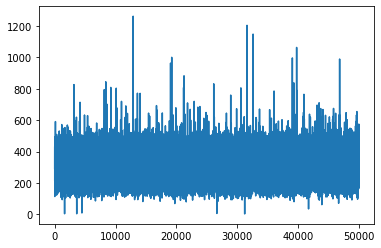

In [281]:
plt.plot(projects.Essay_length)

In [282]:
projects['month'] = month

In [283]:
projects['y'] = [1 if x == 'completed' else 0 for x in projects.funding_status]

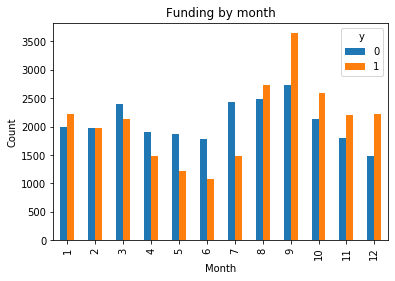

In [284]:
%matplotlib inline
pd.crosstab(projects.month,projects.y).plot(kind='bar')
plt.title('Funding by month')
plt.xlabel('Month')
plt.ylabel('Count')
plt.savefig('Funding by month')

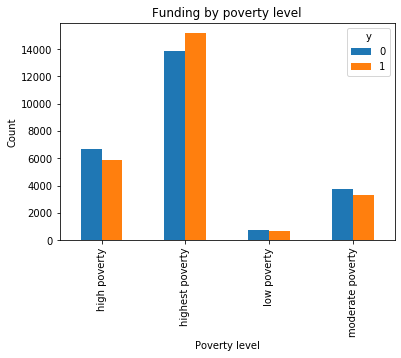

In [285]:
%matplotlib inline
pd.crosstab(projects.poverty_level,projects.y).plot(kind='bar')
plt.title('Funding by poverty level')
plt.xlabel('Poverty level')
plt.ylabel('Count')
plt.savefig('Funding by Poverty Level')

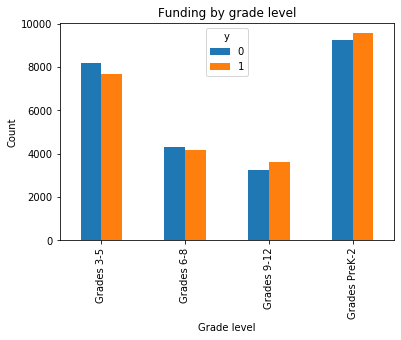

In [286]:
%matplotlib inline
pd.crosstab(projects.grade_level,projects.y).plot(kind='bar')
plt.title('Funding by grade level')
plt.xlabel('Grade level')
plt.ylabel('Count')
plt.savefig('Funding by Grade Level')

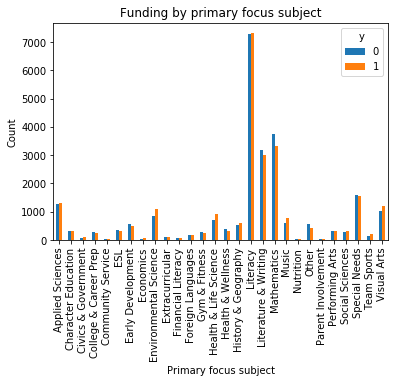

In [287]:
%matplotlib inline
pd.crosstab(projects.primary_focus_subject,projects.y).plot(kind='bar')
plt.title('Funding by primary focus subject')
plt.xlabel('Primary focus subject')
plt.ylabel('Count')
plt.savefig('Funding by primary focus subject')

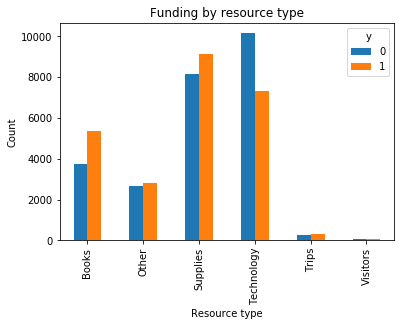

In [288]:
%matplotlib inline
pd.crosstab(projects.resource_type,projects.y).plot(kind='bar')
plt.title('Funding by resource type')
plt.xlabel('Resource type')
plt.ylabel('Count')
plt.savefig('Funding by resource type')

In [289]:
d = pd.DataFrame(projects.groupby('y').total_price_including_optional_support.mean())

In [290]:
d

,total_price_including_optional_support
y,
0,912.277660
1,596.995198


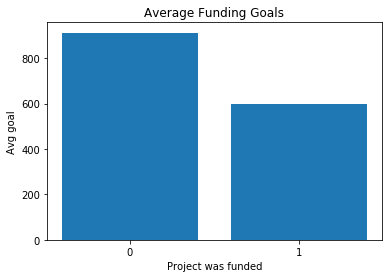

In [291]:



projects.groupby('y').total_price_including_optional_support.mean()

d = pd.DataFrame(projects.groupby('y').total_price_including_optional_support.mean())
%matplotlib inline
plt.bar( d.index,d.total_price_including_optional_support, align='center', alpha=1)
plt.xticks(d.index)
plt.title('Average Funding Goals')
plt.xlabel('Project was funded')
plt.ylabel('Avg goal')
plt.savefig('Funding goals')

#projects.total_price_including_optional_support

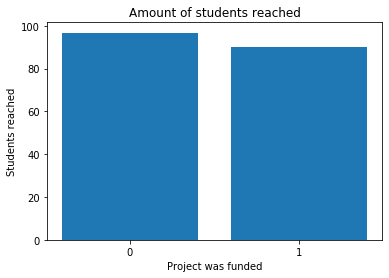

In [292]:
a = pd.DataFrame(projects.groupby('y').students_reached.mean())
%matplotlib inline
plt.bar( a.index,a.students_reached, align='center', alpha=1)
plt.xticks(a.index)
plt.title('Amount of students reached')
plt.xlabel('Project was funded')
plt.ylabel('Students reached')
plt.savefig('students')

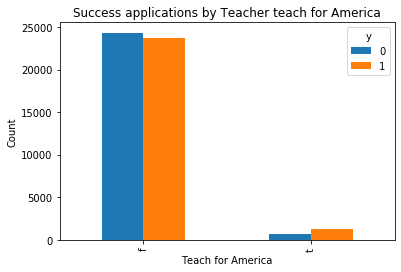

In [293]:
%matplotlib inline
pd.crosstab(projects.teacher_teach_for_america,projects.y).plot(kind='bar')
plt.title('Success applications by Teacher teach for America')
plt.xlabel('Teach for America')
plt.ylabel('Count')
plt.savefig('teach for america')

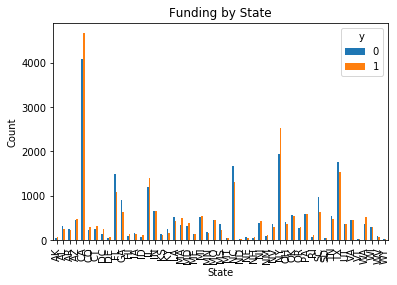

In [294]:
%matplotlib inline
pd.crosstab(projects.school_state,projects.y).plot(kind='bar')
plt.title('Funding by State')
plt.xlabel('State')
plt.ylabel('Count')
plt.savefig('Funding by state')

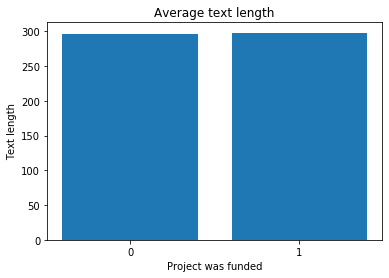

In [295]:
c = pd.DataFrame(projects.groupby('y').Essay_length.mean())
%matplotlib inline
plt.bar( c.index,c.Essay_length, align='center', alpha=1)
plt.xticks(c.index)
plt.title('Average text length')
plt.xlabel('Project was funded')
plt.ylabel('Text length')
plt.savefig('length')

In [296]:
variables = ['primary_focus_subject','grade_level','poverty_level','resource_type',
                'eligible_double_your_impact_match', 'eligible_almost_home_match',
                'teacher_teach_for_america','school_state', 'Essay_length','total_price_including_optional_support',
                'students_reached','month']

X = projects[variables]

In [297]:
y = projects['y']

In [298]:
# one hot encoding

cat_vars=['primary_focus_subject','grade_level','poverty_level','resource_type','eligible_double_your_impact_match',
          'eligible_almost_home_match','teacher_teach_for_america','school_state','month']
for var in cat_vars:
    cat_list='var'+'_'+var
    cat_list = pd.get_dummies(X[var], prefix=var)
    X1=X.join(cat_list)
    X=X1
cat_vars=['primary_focus_subject','grade_level','poverty_level','resource_type','eligible_double_your_impact_match',
          'eligible_almost_home_match','teacher_teach_for_america','school_state','month']
data_vars=X.columns.values.tolist()
to_keep=[i for i in data_vars if i not in cat_vars]

In [299]:
to_keep

['Essay_length',
 'total_price_including_optional_support',
 'students_reached',
 'primary_focus_subject_Applied Sciences',
 'primary_focus_subject_Character Education',
 'primary_focus_subject_Civics & Government',
 'primary_focus_subject_College & Career Prep',
 'primary_focus_subject_Community Service',
 'primary_focus_subject_ESL',
 'primary_focus_subject_Early Development',
 'primary_focus_subject_Economics',
 'primary_focus_subject_Environmental Science',
 'primary_focus_subject_Extracurricular',
 'primary_focus_subject_Financial Literacy',
 'primary_focus_subject_Foreign Languages',
 'primary_focus_subject_Gym & Fitness',
 'primary_focus_subject_Health & Life Science',
 'primary_focus_subject_Health & Wellness',
 'primary_focus_subject_History & Geography',
 'primary_focus_subject_Literacy',
 'primary_focus_subject_Literature & Writing',
 'primary_focus_subject_Mathematics',
 'primary_focus_subject_Music',
 'primary_focus_subject_Nutrition',
 'primary_focus_subject_Other',
 'pri

In [300]:
X_final=X[to_keep]

In [301]:
X_train, X_test, y_train, y_test = train_test_split(X_final, y, test_size=0.33, random_state=42)

In [302]:
X_final.columns.values

array(['Essay_length', 'total_price_including_optional_support',
       'students_reached', 'primary_focus_subject_Applied Sciences',
       'primary_focus_subject_Character Education',
       'primary_focus_subject_Civics & Government',
       'primary_focus_subject_College & Career Prep',
       'primary_focus_subject_Community Service',
       'primary_focus_subject_ESL',
       'primary_focus_subject_Early Development',
       'primary_focus_subject_Economics',
       'primary_focus_subject_Environmental Science',
       'primary_focus_subject_Extracurricular',
       'primary_focus_subject_Financial Literacy',
       'primary_focus_subject_Foreign Languages',
       'primary_focus_subject_Gym & Fitness',
       'primary_focus_subject_Health & Life Science',
       'primary_focus_subject_Health & Wellness',
       'primary_focus_subject_History & Geography',
       'primary_focus_subject_Literacy',
       'primary_focus_subject_Literature & Writing',
       'primary_focus_subject_M

In [303]:
X_train

,Essay_length,total_price_including_optional_support,students_reached,primary_focus_subject_Applied Sciences,primary_focus_subject_Character Education,primary_focus_subject_Civics & Government,primary_focus_subject_College & Career Prep,primary_focus_subject_Community Service,primary_focus_subject_ESL,primary_focus_subject_Early Development,...,month_3,month_4,month_5,month_6,month_7,month_8,month_9,month_10,month_11,month_12
23990,312,709.59,23.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
8729,421,413.86,450.0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
3451,233,241.09,24.0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
2628,180,184.79,45.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
38352,423,772.55,185.0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11284,241,629.96,27.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
44732,292,731.61,500.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
38158,108,173.76,21.0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
860,358,726.46,100.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [304]:
X_train.students_reached[X_train.students_reached.isna()==True] = X_train.students_reached.mean(skipna = True)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/pandas/core/generic.py:9114: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)
/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:3326: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  exec(code_obj, 

In [305]:
sum(X_test.students_reached.isna()==True)

1

In [306]:
X_test.students_reached[X_test.students_reached.isna()==True] = X_test.students_reached.mean(skipna = True)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [307]:
C_values = [0.0001, 0.001,0.01, 0.1, 1, 10, 100, 1000, 10000] 
acc_train = []
acc_test = []

ber_train = []
ber_test = []

In [308]:
#Define a function to calculate Accuracy and BER from two sets:

def ModelPerformance(model, X, y):
    predictions = model.predict(X)
    tn, fp, fn, tp = confusion_matrix(y, predictions).ravel()
    accuracy = (tp + tn) / (tp + tn + fp + fn)
    TPR = tp / (tp + fn)
    TNR = tn / (tn + fp)
    BER = 1 - 1/2 * (TPR + TNR)
    return accuracy, BER

In [309]:
for c in C_values:
    
    model = LogisticRegression(C=c,max_iter=1000000)
    model.fit(X_train, y_train)
    
    # Calculate performance indicators (accuracy and BER) for training, validation and test sets.
    
    accuracy_train, BER_train = ModelPerformance(model, X_train, y_train)
    acc_train.append(accuracy_train)
    ber_train.append(BER_train)
    
    accuracy_test, BER_test = ModelPerformance(model, X_test, y_test)
    acc_test.append(accuracy_test)
    ber_test.append(BER_test)
    
    
    print("C", c)
    print("Training accuracy = " + str(accuracy_train) + "; Training BER = " + str(BER_train))
    print("Test accuracy = " + str(accuracy_test) + "; Test BER = " + str(BER_test) +"\n")


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


C 0.0001
Training accuracy = 0.6214925373134328; Training BER = 0.37815001682925065
Test accuracy = 0.6172121212121212; Test BER = 0.3835388389297214



/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


C 0.001
Training accuracy = 0.6425671641791045; Training BER = 0.3572878624775919
Test accuracy = 0.6372121212121212; Test BER = 0.3631177157464943



/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


C 0.01
Training accuracy = 0.6457014925373135; Training BER = 0.35423835921707425
Test accuracy = 0.6424848484848484; Test BER = 0.35768323594351825



/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


C 0.1
Training accuracy = 0.6478805970149254; Training BER = 0.3520738030787206
Test accuracy = 0.6415151515151515; Test BER = 0.3586112230399163



/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


C 1
Training accuracy = 0.6473134328358209; Training BER = 0.3526445918339298
Test accuracy = 0.6406060606060606; Test BER = 0.3595182283830345



/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


C 10
Training accuracy = 0.6471044776119403; Training BER = 0.35285365292827253
Test accuracy = 0.6407272727272727; Test BER = 0.35939274927028164



/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


C 100
Training accuracy = 0.6473432835820896; Training BER = 0.3526152575548279
Test accuracy = 0.6411515151515151; Test BER = 0.3589689119767845



/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


C 1000
Training accuracy = 0.6471044776119403; Training BER = 0.35285323946820246
Test accuracy = 0.6407878787878788; Test BER = 0.3593325663140948



/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


C 10000
Training accuracy = 0.6470746268656716; Training BER = 0.3528831939374093
Test accuracy = 0.6407878787878788; Test BER = 0.3593325663140948



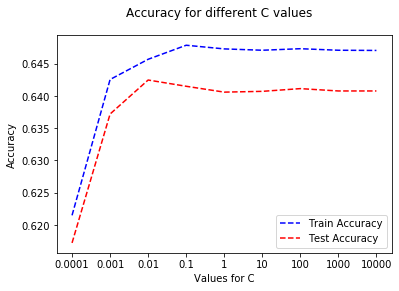

In [310]:
#plt.scatter(X_test, y_test,  color='gray')
eje_x = [0,1,2,3,4,5,6,7,8]
plt.plot(eje_x, acc_train,'b--',  label='Train Accuracy')
plt.plot(eje_x, acc_test,'r--',  label='Test Accuracy')

plt.suptitle('Accuracy for different C values')
plt.xlabel('Values for C')
plt.xticks(eje_x, C_values)
plt.ylabel('Accuracy')
plt.legend()
plt.savefig('ACC1')
plt.show()


In [311]:
X_train.columns.values

array(['Essay_length', 'total_price_including_optional_support',
       'students_reached', 'primary_focus_subject_Applied Sciences',
       'primary_focus_subject_Character Education',
       'primary_focus_subject_Civics & Government',
       'primary_focus_subject_College & Career Prep',
       'primary_focus_subject_Community Service',
       'primary_focus_subject_ESL',
       'primary_focus_subject_Early Development',
       'primary_focus_subject_Economics',
       'primary_focus_subject_Environmental Science',
       'primary_focus_subject_Extracurricular',
       'primary_focus_subject_Financial Literacy',
       'primary_focus_subject_Foreign Languages',
       'primary_focus_subject_Gym & Fitness',
       'primary_focus_subject_Health & Life Science',
       'primary_focus_subject_Health & Wellness',
       'primary_focus_subject_History & Geography',
       'primary_focus_subject_Literacy',
       'primary_focus_subject_Literature & Writing',
       'primary_focus_subject_M

In [312]:
X_final

,Essay_length,total_price_including_optional_support,students_reached,primary_focus_subject_Applied Sciences,primary_focus_subject_Character Education,primary_focus_subject_Civics & Government,primary_focus_subject_College & Career Prep,primary_focus_subject_Community Service,primary_focus_subject_ESL,primary_focus_subject_Early Development,...,month_3,month_4,month_5,month_6,month_7,month_8,month_9,month_10,month_11,month_12
0,292,2350.91,30.0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1,319,478.92,112.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,244,916.26,10.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,290,593.28,25.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,236,337.54,60.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,258,724.39,100.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
49996,194,666.26,5.0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
49997,292,313.86,36.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
49998,220,228.72,32.0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0


In [313]:
X_final['id'] = projects['_projectid']

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [314]:
X_final.head()

,Essay_length,total_price_including_optional_support,students_reached,primary_focus_subject_Applied Sciences,primary_focus_subject_Character Education,primary_focus_subject_Civics & Government,primary_focus_subject_College & Career Prep,primary_focus_subject_Community Service,primary_focus_subject_ESL,primary_focus_subject_Early Development,...,month_4,month_5,month_6,month_7,month_8,month_9,month_10,month_11,month_12,id
0,292,2350.91,30.0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,f72fea86e94f406b87628178503ff464
1,319,478.92,112.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,a59bb8248f763dfd5c504f6fa1f459a2
2,244,916.26,10.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0df664d7eefd7526b56cfea8b9a86546
3,290,593.28,25.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,f7f13e583bfc0e7a5a6963f72c530f28
4,236,337.54,60.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,a36f288f2a883843a7453fe4895a4825


Only using Text:

In [325]:
text_feats.fillna(0,inplace=True)

In [326]:
texto_features =  pd.merge(projects[['_projectid','y']], text_feats, on ='_projectid')

In [327]:
texto_features.head()

,_projectid,y,Unnamed: 0,anger,anticipation,disgust,fear,joy,negative,positive,...,success,successful,supplies,teach,teacher,technology,time,title,wonderful,working
0,f72fea86e94f406b87628178503ff464,0,1,0.0,5.0,0.0,0.0,6.0,0.0,12.0,...,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000
1,a59bb8248f763dfd5c504f6fa1f459a2,1,2,0.0,4.0,0.0,0.0,3.0,0.0,8.0,...,0.0,0.0,0.203147,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000
2,0df664d7eefd7526b56cfea8b9a86546,0,3,0.0,2.0,0.0,0.0,6.0,1.0,17.0,...,0.0,0.0,0.000000,0.106057,0.074889,0.0,0.0,0.0,0.000000,0.000000
3,f7f13e583bfc0e7a5a6963f72c530f28,0,4,0.0,2.0,0.0,0.0,7.0,1.0,10.0,...,0.0,0.0,0.000000,0.083961,0.118574,0.0,0.0,0.0,0.177303,0.000000
4,a36f288f2a883843a7453fe4895a4825,1,5,0.0,1.0,0.0,0.0,1.0,0.0,8.0,...,0.0,0.0,0.000000,0.000000,0.109453,0.0,0.0,0.0,0.000000,0.127256


In [328]:
y_texto = texto_features['y']

In [329]:
texto_features.columns.values

array(['_projectid', 'y', 'Unnamed: 0', 'anger', 'anticipation',
       'disgust', 'fear', 'joy', 'negative', 'positive', 'sadness',
       'surprise', 'trust', 'sentiment', 'ability', 'academic', 'benefit',
       'build', 'center', 'child', 'community', 'create', 'daily',
       'develop', 'difficult', 'diverse', 'donation', 'eager', 'enjoy',
       'excited', 'explore', 'fun', 'good', 'important', 'improve',
       'instruction', 'knowledge', 'learn', 'learning', 'level',
       'library', 'limited', 'love', 'opportunity', 'poverty', 'practice',
       'provide', 'public', 'reading', 'resources', 'school', 'share',
       'show', 'small', 'special', 'success', 'successful', 'supplies',
       'teach', 'teacher', 'technology', 'time', 'title', 'wonderful',
       'working'], dtype=object)

In [330]:
texto_features.drop(columns=['_projectid', 'y', 'Unnamed: 0'],inplace=True, errors='raise')

In [331]:
X_text_train, X_text_test, y_text_train, y_text_test = train_test_split(texto_features, y_texto, test_size=0.33, random_state=42)

In [332]:
acc_text_train = []
acc_text_test = []
BER_text_train = []
BER_text_test = []

In [333]:
for c in C_values:
    
    model = LogisticRegression(C=c,max_iter=1000000)
    model.fit(X_text_train, y_text_train)
    
    # Calculate performance indicators (accuracy and BER) for training, validation and test sets.
    
    accuracy_train, BER_train = ModelPerformance(model, X_text_train, y_text_train)
    acc_text_train.append(accuracy_train)
    BER_text_train.append(BER_train)
    
    accuracy_test, BER_test = ModelPerformance(model, X_text_test, y_text_test)
    acc_text_test.append(accuracy_test)
    BER_text_test.append(BER_test)
    
    
    print("C", c)
    print("Training accuracy = " + str(accuracy_train) + "; Training BER = " + str(BER_train))
    print("Test accuracy = " + str(accuracy_test) + "; Test BER = " + str(BER_test) +"\n")


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


C 0.0001
Training accuracy = 0.5064776119402985; Training BER = 0.49412337796763106
Test accuracy = 0.5111515151515151; Test BER = 0.4876003127633004

C 0.001
Training accuracy = 0.5245074626865671; Training BER = 0.47575489397001847
Test accuracy = 0.518; Test BER = 0.4814762855643657



/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


C 0.01
Training accuracy = 0.544955223880597; Training BER = 0.4549142038988885
Test accuracy = 0.5371515151515152; Test BER = 0.463170910662163



/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


C 0.1
Training accuracy = 0.550179104477612; Training BER = 0.44969925342228034
Test accuracy = 0.5408484848484848; Test BER = 0.45941112152819574



/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


C 1
Training accuracy = 0.5507462686567164; Training BER = 0.4491534790013041
Test accuracy = 0.5423636363636364; Test BER = 0.45785200681948124



/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


C 10
Training accuracy = 0.5499402985074627; Training BER = 0.44996204293985276
Test accuracy = 0.5422424242424242; Test BER = 0.4579715205317916



/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


C 100
Training accuracy = 0.5498507462686567; Training BER = 0.4500506659672633
Test accuracy = 0.5421818181818182; Test BER = 0.4580368166883576



/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


C 1000
Training accuracy = 0.5497910447761194; Training BER = 0.45011057490567685
Test accuracy = 0.542060606060606; Test BER = 0.4581597392009208



/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


C 10000
Training accuracy = 0.5497910447761194; Training BER = 0.45011078163571194
Test accuracy = 0.5421818181818182; Test BER = 0.458038521088484



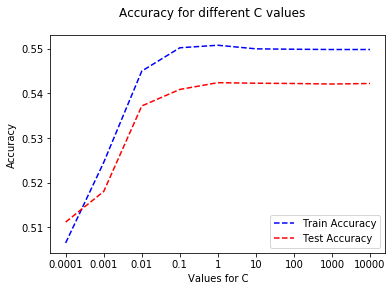

In [334]:
#plt.scatter(X_test, y_test,  color='gray')


eje_x = [0,1,2,3,4,5,6,7,8]
plt.plot(eje_x, acc_text_train,'b--',  label='Train Accuracy')
plt.plot(eje_x, acc_text_test,'r--',  label='Test Accuracy')

plt.suptitle('Accuracy for different C values')
plt.xlabel('Values for C')
plt.xticks(eje_x, C_values)
plt.ylabel('Accuracy')
plt.legend()
plt.savefig('ACC2')
plt.show()


Now all the variables:

In [128]:
X_final.columns.values

array(['Essay_length', 'total_price_including_optional_support',
       'students_reached', 'primary_focus_subject_Applied Sciences',
       'primary_focus_subject_Character Education',
       'primary_focus_subject_Civics & Government',
       'primary_focus_subject_College & Career Prep',
       'primary_focus_subject_Community Service',
       'primary_focus_subject_ESL',
       'primary_focus_subject_Early Development',
       'primary_focus_subject_Economics',
       'primary_focus_subject_Environmental Science',
       'primary_focus_subject_Extracurricular',
       'primary_focus_subject_Financial Literacy',
       'primary_focus_subject_Foreign Languages',
       'primary_focus_subject_Gym & Fitness',
       'primary_focus_subject_Health & Life Science',
       'primary_focus_subject_Health & Wellness',
       'primary_focus_subject_History & Geography',
       'primary_focus_subject_Literacy',
       'primary_focus_subject_Literature & Writing',
       'primary_focus_subject_M

In [132]:
all_features = pd.merge(X_final,text_feats, on ='_projectid')

In [135]:
all_features.columns.values

array(['Essay_length', 'total_price_including_optional_support',
       'students_reached', 'primary_focus_subject_Applied Sciences',
       'primary_focus_subject_Character Education',
       'primary_focus_subject_Civics & Government',
       'primary_focus_subject_College & Career Prep',
       'primary_focus_subject_Community Service',
       'primary_focus_subject_ESL',
       'primary_focus_subject_Early Development',
       'primary_focus_subject_Economics',
       'primary_focus_subject_Environmental Science',
       'primary_focus_subject_Extracurricular',
       'primary_focus_subject_Financial Literacy',
       'primary_focus_subject_Foreign Languages',
       'primary_focus_subject_Gym & Fitness',
       'primary_focus_subject_Health & Life Science',
       'primary_focus_subject_Health & Wellness',
       'primary_focus_subject_History & Geography',
       'primary_focus_subject_Literacy',
       'primary_focus_subject_Literature & Writing',
       'primary_focus_subject_M

In [134]:
all_features.drop(columns=['id','Unnamed: 0','_projectid'],inplace=True, errors='raise')

In [136]:
all_features.fillna(0,inplace=True)

Now PCA:

In [ ]:
columnas = len(all_features.columns.values)

In [140]:

pca = PCA(n_components=columnas)
pca.fit(all_features)
print(pca.components_)

[[ 9.40318280e-03  9.99883525e-01  1.20172787e-02 ... -7.80020149e-07
  -7.49734939e-07  2.03314893e-07]
 [ 2.15302002e-02 -1.22155794e-02  9.99671108e-01 ... -3.26889221e-06
  -8.02093048e-06 -1.72180821e-06]
 [ 9.98267806e-01 -9.14740122e-03 -2.12818963e-02 ... -1.88952497e-05
  -1.51109737e-05  1.55372864e-05]
 ...
 [ 0.00000000e+00  1.29560307e-18 -7.04430768e-18 ... -1.55257751e-16
   1.50053581e-16  5.89805982e-17]
 [ 0.00000000e+00  4.67420739e-19 -5.58332561e-18 ... -7.64796212e-16
  -9.30245464e-17 -2.88614618e-16]
 [ 0.00000000e+00 -2.98759770e-18 -3.40712701e-17 ... -1.51371103e-13
  -3.78473294e-14 -1.23146805e-12]]


In [141]:
#Train model again
X_train, X_test, y_train, y_test = train_test_split(all_features, y, test_size=0.33, random_state=42)

In [142]:
Xpca_train = np.matmul(X_train, pca.components_.T)
Xpca_test = np.matmul(X_test, pca.components_.T)

In [148]:
N = [5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75, 80, 85, 90, 95, 100, 105]

In [149]:
bestModel = None

n_acc_train = []
n_acc_test = []

n_ber_train = []
n_ber_test = []

In [150]:
for n in N:
    
    reduced_train = Xpca_train.iloc[:,0:n]
    #reduced_validation = Xpca_valid.iloc[:,0:n]
    reduced_test = Xpca_test.iloc[:,0:n]
    
    mod = LogisticRegression(C=1.0, class_weight='balanced', max_iter=100000)
    mod.fit(reduced_train, y_train)
    
    # Calculate performance indicators (accuracy and BER) for training, validation and test sets.
    
    accuracy_train, BER_train = ModelPerformance(mod, reduced_train, y_train)
    n_acc_train.append(accuracy_train)
    n_ber_train.append(BER_train)
    
    
    accuracy_test, BER_test = ModelPerformance(mod, reduced_test, y_test)
    n_acc_test.append(accuracy_test)
    n_ber_test.append(BER_test)
    
    
    print("N", n)
    print("Training accuracy = " + str(accuracy_train) + "; Training BER = " + str(BER_train))
    #print("Validation accuracy = " + str(accuracy_valid) + "; Validation BER = " + str(BER_valid))
    print("Test accuracy = " + str(accuracy_test) + "; Test BER = " + str(BER_test) +"\n")
    
    

    #if not bestModel or mseValid < bestMSE:
     #   bestModel = model
      #  bestMSE = mseValid

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


N 5
Training accuracy = 0.6058805970149254; Training BER = 0.39362063761131627
Test accuracy = 0.600909090909091; Test BER = 0.4001515975753791



/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


N 10
Training accuracy = 0.6071343283582089; Training BER = 0.39238239598798885
Test accuracy = 0.6061212121212122; Test BER = 0.3948574075345299



/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


N 15
Training accuracy = 0.6185970149253731; Training BER = 0.3811856335343149
Test accuracy = 0.6144242424242424; Test BER = 0.38603795969434573



/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


N 20
Training accuracy = 0.6197014925373134; Training BER = 0.38015132752618686
Test accuracy = 0.6156969696969697; Test BER = 0.3846582184058287



/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


N 25
Training accuracy = 0.6182985074626866; Training BER = 0.38155174529764735
Test accuracy = 0.6192727272727273; Test BER = 0.3810622573874578



/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


N 30
Training accuracy = 0.6299701492537313; Training BER = 0.3699466339959073
Test accuracy = 0.6267878787878788; Test BER = 0.3734103824062651



/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


N 35
Training accuracy = 0.6350746268656716; Training BER = 0.3648304149325581
Test accuracy = 0.6321212121212121; Test BER = 0.3680801942592983



/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


N 40
Training accuracy = 0.6377611940298508; Training BER = 0.36217193084027755
Test accuracy = 0.6343636363636364; Test BER = 0.3658022928765948



/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


N 45
Training accuracy = 0.6406865671641792; Training BER = 0.35923949380853526
Test accuracy = 0.6344848484848484; Test BER = 0.36568959676478996



/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


N 50
Training accuracy = 0.6404776119402985; Training BER = 0.35945082893326274
Test accuracy = 0.6353333333333333; Test BER = 0.3648453309780483



/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


N 55
Training accuracy = 0.6411044776119403; Training BER = 0.35883336196187887
Test accuracy = 0.6363030303030303; Test BER = 0.36386365527766906



/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


N 60
Training accuracy = 0.6417313432835821; Training BER = 0.3582026642682561
Test accuracy = 0.6371515151515151; Test BER = 0.36302109389105386



/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


N 65
Training accuracy = 0.6428955223880597; Training BER = 0.35703299285894574
Test accuracy = 0.6383030303030303; Test BER = 0.3618690957228725



/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


N 70
Training accuracy = 0.6428955223880597; Training BER = 0.35703712745964544
Test accuracy = 0.6378181818181818; Test BER = 0.3623369241713559



/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


N 75
Training accuracy = 0.6436716417910447; Training BER = 0.35626637373163283
Test accuracy = 0.6384848484848484; Test BER = 0.3616689462528586



/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


N 80
Training accuracy = 0.6434029850746269; Training BER = 0.3565334831940743
Test accuracy = 0.639090909090909; Test BER = 0.3610696732911802



/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


N 85
Training accuracy = 0.6445671641791044; Training BER = 0.35536980695577847
Test accuracy = 0.6391515151515151; Test BER = 0.36100693373480386



/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


N 90
Training accuracy = 0.6448059701492538; Training BER = 0.35513058466219394
Test accuracy = 0.638969696969697; Test BER = 0.3611925958037434



/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


N 95
Training accuracy = 0.6458208955223881; Training BER = 0.3541228826709817
Test accuracy = 0.6396363636363637; Test BER = 0.36052376568518296



/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


N 100
Training accuracy = 0.6464179104477612; Training BER = 0.3535215192564608
Test accuracy = 0.6392727272727273; Test BER = 0.36087975022192464



/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


N 105
Training accuracy = 0.6470746268656716; Training BER = 0.3528697564851355
Test accuracy = 0.6383030303030303; Test BER = 0.3618426775209136



The best results are given by 95 components

N 95

Training accuracy = 0.6458208955223881; 

Training BER = 0.3541228826709817

Test accuracy = 0.6396363636363637; 

Test BER = 0.36052376568518296

In [194]:
X_train.columns.values

array(['Essay_length', 'total_price_including_optional_support',
       'students_reached', 'primary_focus_subject_Applied Sciences',
       'primary_focus_subject_Character Education',
       'primary_focus_subject_Civics & Government',
       'primary_focus_subject_College & Career Prep',
       'primary_focus_subject_Community Service',
       'primary_focus_subject_ESL',
       'primary_focus_subject_Early Development',
       'primary_focus_subject_Economics',
       'primary_focus_subject_Environmental Science',
       'primary_focus_subject_Extracurricular',
       'primary_focus_subject_Financial Literacy',
       'primary_focus_subject_Foreign Languages',
       'primary_focus_subject_Gym & Fitness',
       'primary_focus_subject_Health & Life Science',
       'primary_focus_subject_Health & Wellness',
       'primary_focus_subject_History & Geography',
       'primary_focus_subject_Literacy',
       'primary_focus_subject_Literature & Writing',
       'primary_focus_subject_M

In [195]:
X_train.students_reached[X_train.students_reached.isna()==True] = X_train.students_reached.mean(skipna = True)
X_test.students_reached[X_test.students_reached.isna()==True] = X_test.students_reached.mean(skipna = True)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/pandas/core/generic.py:9114: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)
/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:3326: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  exec(code_obj, 

In [196]:
C_values = [0.0001, 0.001,0.01, 0.1, 1, 10, 100, 1000, 10000] 
acc_train = []
acc_test = []

ber_train = []
ber_test = []

In [197]:
for c in C_values:
    
    model = LogisticRegression(C=c,max_iter=1000000)
    model.fit(X_train, y_train)
    
    # Calculate performance indicators (accuracy and BER) for training, validation and test sets.
    
    accuracy_train, BER_train = ModelPerformance(model, X_train, y_train)
    acc_train.append(accuracy_train)
    ber_train.append(BER_train)
    
    accuracy_test, BER_test = ModelPerformance(model, X_test, y_test)
    acc_test.append(accuracy_test)
    ber_test.append(BER_test)
    
    
    print("C", c)
    print("Training accuracy = " + str(accuracy_train) + "; Training BER = " + str(BER_train))
    print("Test accuracy = " + str(accuracy_test) + "; Test BER = " + str(BER_test) +"\n")

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


C 0.0001
Training accuracy = 0.6213432835820896; Training BER = 0.37831488046783823
Test accuracy = 0.6196363636363637; Test BER = 0.38107186667782567



/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


C 0.001
Training accuracy = 0.642179104477612; Training BER = 0.357669828296021
Test accuracy = 0.6366666666666667; Test BER = 0.36366021455223874



/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


C 0.01
Training accuracy = 0.6480597014925373; Training BER = 0.35187795132075106
Test accuracy = 0.6420606060606061; Test BER = 0.35811644743771065



/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


C 0.1
Training accuracy = 0.6490746268656716; Training BER = 0.3508772781507282
Test accuracy = 0.6413333333333333; Test BER = 0.35880455490942464



/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


C 1
Training accuracy = 0.6497611940298508; Training BER = 0.35019597437026606
Test accuracy = 0.6408484848484849; Test BER = 0.35926386135727606



/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


C 10
Training accuracy = 0.6493134328358209; Training BER = 0.35064549813840307
Test accuracy = 0.6406666666666667; Test BER = 0.3594461146259629



/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


C 100
Training accuracy = 0.6491940298507463; Training BER = 0.3507657294753004
Test accuracy = 0.6405454545454545; Test BER = 0.3595664805383365



/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


C 1000
Training accuracy = 0.6492835820895523; Training BER = 0.3506762795277498
Test accuracy = 0.6404242424242425; Test BER = 0.35968684645071014



/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


C 10000
Training accuracy = 0.6488955223880597; Training BER = 0.3510607261065988
Test accuracy = 0.6401212121212121; Test BER = 0.3599877612316442



In [45]:
projects.columns.values

array(['_projectid', '_teacher_acctid', '_schoolid', 'school_ncesid',
       'school_latitude', 'school_longitude', 'school_city',
       'school_state', 'school_zip', 'school_metro', 'school_district',
       'school_county', 'school_charter', 'school_magnet',
       'school_year_round', 'school_nlns', 'school_kipp',
       'school_charter_ready_promise', 'teacher_prefix',
       'teacher_teach_for_america', 'teacher_ny_teaching_fellow',
       'primary_focus_subject', 'primary_focus_area',
       'secondary_focus_subject', 'secondary_focus_area', 'resource_type',
       'poverty_level', 'grade_level', 'vendor_shipping_charges',
       'sales_tax', 'payment_processing_charges',
       'fulfillment_labor_materials',
       'total_price_excluding_optional_support',
       'total_price_including_optional_support', 'students_reached',
       'total_donations', 'num_donors',
       'eligible_double_your_impact_match', 'eligible_almost_home_match',
       'funding_status', 'date_posted', 'd

Some deep learning approach:

In [151]:
from keras import Sequential
from keras.layers import Dense

Using TensorFlow backend.


In [152]:
classifier = Sequential()
#First Hidden Layer
classifier.add(Dense(4, activation='relu', kernel_initializer='random_normal', input_dim=columnas))
#Second  Hidden Layer
classifier.add(Dense(4, activation='relu', kernel_initializer='random_normal'))
#Output Layer
classifier.add(Dense(1, activation='sigmoid', kernel_initializer='random_normal'))

In [153]:
#Compiling the neural network
classifier.compile(optimizer ='adam',loss='binary_crossentropy', metrics =['accuracy'])

In [154]:
#Fitting the data to the training dataset
classifier.fit(X_train,y_train, batch_size=10, epochs=100)

Epoch 1/100
33500/33500 [==============================] - 5s 149us/step - loss: 0.6594 - accuracy: 0.6129
Epoch 2/100
33500/33500 [==============================] - 4s 122us/step - loss: 0.6519 - accuracy: 0.6198
Epoch 3/100
33500/33500 [==============================] - 4s 120us/step - loss: 0.6415 - accuracy: 0.6325
Epoch 4/100
33500/33500 [==============================] - 4s 119us/step - loss: 0.6332 - accuracy: 0.6426
Epoch 5/100
33500/33500 [==============================] - 4s 121us/step - loss: 0.6304 - accuracy: 0.6476
Epoch 6/100
33500/33500 [==============================] - 4s 122us/step - loss: 0.6282 - accuracy: 0.6513
Epoch 7/100
33500/33500 [==============================] - 4s 120us/step - loss: 0.6261 - accuracy: 0.6507
Epoch 8/100
33500/33500 [==============================] - 4s 120us/step - loss: 0.6249 - accuracy: 0.65410s - loss: 0.6
Epoch 9/100
33500/33500 [==============================] - 4s 125us/step - loss: 0.6241 - accuracy: 0.6498
Epoch 10/100
33500/3350

In [156]:
y_pred=classifier.predict(X_test)
y_pred =(y_pred>0.5)

cm = confusion_matrix(y_test, y_pred)
print(cm)

[[5340 2852]
 [2882 5426]]


In [157]:
(5340 + 5426 )/ (5340 + 5426 + 2852 + 2882)

0.6524848484848484

In [158]:
classifier = Sequential()
#First Hidden Layer
classifier.add(Dense(8, activation='relu', kernel_initializer='random_normal', input_dim=columnas))
#Second  Hidden Layer
classifier.add(Dense(8, activation='relu', kernel_initializer='random_normal'))

#Third  Hidden Layer
classifier.add(Dense(8, activation='relu', kernel_initializer='random_normal'))
#Output Layer
classifier.add(Dense(1, activation='sigmoid', kernel_initializer='random_normal'))

In [159]:
#Compiling the neural network
classifier.compile(optimizer ='adam',loss='binary_crossentropy', metrics =['accuracy'])

In [160]:
#Fitting the data to the training dataset
classifier.fit(X_train,y_train, batch_size=10, epochs=100)

Epoch 1/100
33500/33500 [==============================] - 5s 135us/step - loss: 0.6611 - accuracy: 0.6126
Epoch 2/100
33500/33500 [==============================] - 5s 153us/step - loss: 0.6535 - accuracy: 0.6222
Epoch 3/100
33500/33500 [==============================] - 5s 151us/step - loss: 0.6421 - accuracy: 0.6343
Epoch 4/100
33500/33500 [==============================] - 5s 151us/step - loss: 0.6335 - accuracy: 0.6412
Epoch 5/100
33500/33500 [==============================] - 5s 143us/step - loss: 0.6301 - accuracy: 0.6429
Epoch 6/100
33500/33500 [==============================] - 5s 144us/step - loss: 0.6281 - accuracy: 0.6466
Epoch 7/100
33500/33500 [==============================] - 5s 137us/step - loss: 0.6260 - accuracy: 0.6530
Epoch 8/100
33500/33500 [==============================] - 5s 140us/step - loss: 0.6258 - accuracy: 0.6507
Epoch 9/100
33500/33500 [==============================] - 5s 139us/step - loss: 0.6240 - accuracy: 0.6514
Epoch 10/100
33500/33500 [===========

In [162]:
y_pred=classifier.predict(X_test)
y_pred =(y_pred>0.5)

cm2 = confusion_matrix(y_test, y_pred)
print(cm2)

[[5415 2777]
 [2940 5368]]


In [164]:
(5415+5368) / (5415+2777+2940+5368)

0.6535151515151515

In [174]:
classifier = Sequential()
#First Hidden Layer
classifier.add(Dense(16, activation='relu', kernel_initializer='random_normal', input_dim=columnas))
#Second  Hidden Layer
classifier.add(Dense(16, activation='relu', kernel_initializer='random_normal'))

#Third  Hidden Layer
classifier.add(Dense(8, activation='relu', kernel_initializer='random_normal'))

#Fourth  Hidden Layer
classifier.add(Dense(8, activation='relu', kernel_initializer='random_normal'))

#Third  Hidden Layer
classifier.add(Dense(4, activation='relu', kernel_initializer='random_normal'))

#Fourth  Hidden Layer
classifier.add(Dense(4, activation='relu', kernel_initializer='random_normal'))
#Output Layer
classifier.add(Dense(1, activation='sigmoid', kernel_initializer='random_normal'))

In [175]:
#Compiling the neural network
classifier.compile(optimizer ='adam',loss='binary_crossentropy', metrics =['accuracy'])

In [176]:
#Fitting the data to the training dataset
classifier.fit(X_train,y_train, batch_size=10, epochs=100)

Epoch 1/100
33500/33500 [==============================] - 6s 173us/step - loss: 0.6621 - accuracy: 0.6086
Epoch 2/100
33500/33500 [==============================] - 6s 169us/step - loss: 0.6550 - accuracy: 0.6179
Epoch 3/100
33500/33500 [==============================] - 6s 171us/step - loss: 0.6458 - accuracy: 0.6287
Epoch 4/100
33500/33500 [==============================] - 6s 170us/step - loss: 0.6353 - accuracy: 0.6413
Epoch 5/100
33500/33500 [==============================] - 6s 172us/step - loss: 0.6305 - accuracy: 0.6477
Epoch 6/100
33500/33500 [==============================] - 6s 173us/step - loss: 0.6279 - accuracy: 0.6490
Epoch 7/100
33500/33500 [==============================] - 6s 181us/step - loss: 0.6268 - accuracy: 0.6499
Epoch 8/100
33500/33500 [==============================] - 6s 172us/step - loss: 0.6268 - accuracy: 0.6491
Epoch 9/100
33500/33500 [==============================] - 6s 183us/step - loss: 0.6257 - accuracy: 0.6502
Epoch 10/100
33500/33500 [===========

In [177]:
y_pred=classifier.predict(X_test)
y_pred =(y_pred>0.5)

cm2 = confusion_matrix(y_test, y_pred)
print(cm2)

[[6309 1883]
 [4005 4303]]


In [178]:
(6309+4303)/(6309+1883+ 4005+4303)

0.6431515151515151

In [169]:
classifier = Sequential()
#First Hidden Layer
classifier.add(Dense(30, activation='relu', kernel_initializer='random_normal', input_dim=columnas))
#Second  Hidden Layer
classifier.add(Dense(30, activation='relu', kernel_initializer='random_normal'))

#Third  Hidden Layer
classifier.add(Dense(15, activation='relu', kernel_initializer='random_normal'))

#Fourth  Hidden Layer
classifier.add(Dense(15, activation='relu', kernel_initializer='random_normal'))

#Third  Hidden Layer
classifier.add(Dense(10, activation='relu', kernel_initializer='random_normal'))

#Fourth  Hidden Layer
classifier.add(Dense(4, activation='relu', kernel_initializer='random_normal'))
#Output Layer
classifier.add(Dense(1, activation='sigmoid', kernel_initializer='random_normal'))

In [170]:
#Compiling the neural network
classifier.compile(optimizer ='adam',loss='binary_crossentropy', metrics =['accuracy'])

In [171]:
#Fitting the data to the training dataset
classifier.fit(X_train,y_train, batch_size=10, epochs=100)

Epoch 1/100
33500/33500 [==============================] - 6s 187us/step - loss: 0.6637 - accuracy: 0.6101
Epoch 2/100
33500/33500 [==============================] - 6s 189us/step - loss: 0.6533 - accuracy: 0.6216
Epoch 3/100
33500/33500 [==============================] - 6s 193us/step - loss: 0.6443 - accuracy: 0.6296
Epoch 4/100
33500/33500 [==============================] - 7s 195us/step - loss: 0.6345 - accuracy: 0.6420
Epoch 5/100
33500/33500 [==============================] - 6s 189us/step - loss: 0.6322 - accuracy: 0.6452
Epoch 6/100
33500/33500 [==============================] - 6s 181us/step - loss: 0.6314 - accuracy: 0.6456
Epoch 7/100
33500/33500 [==============================] - 6s 186us/step - loss: 0.6297 - accuracy: 0.6463
Epoch 8/100
33500/33500 [==============================] - 6s 185us/step - loss: 0.6273 - accuracy: 0.6481
Epoch 9/100
33500/33500 [==============================] - 6s 186us/step - loss: 0.6260 - accuracy: 0.6486
Epoch 10/100
33500/33500 [===========

In [172]:
y_pred=classifier.predict(X_test)
y_pred =(y_pred>0.5)

cm2 = confusion_matrix(y_test, y_pred)
print(cm2)

[[5729 2463]
 [3322 4986]]


In [173]:
(5729+4986)/(5729+2463+3322+4986)

0.6493939393939394

Last one PCA + Deep Learning:

In [179]:
n = 95
reduced_train = Xpca_train.iloc[:,0:n]
reduced_test = Xpca_test.iloc[:,0:n]

In [183]:
reduced_train

,Essay_length,total_price_including_optional_support,students_reached,primary_focus_subject_Applied Sciences,primary_focus_subject_Character Education,primary_focus_subject_Civics & Government,primary_focus_subject_College & Career Prep,primary_focus_subject_Community Service,primary_focus_subject_ESL,primary_focus_subject_Early Development,...,school_state_NY,school_state_OH,school_state_OK,school_state_OR,school_state_PA,school_state_RI,school_state_SC,school_state_SD,school_state_TN,school_state_TX
23990,712.725944,20.848810,306.130800,14.148786,-0.210743,0.815190,-0.300940,2.099402,-1.517086,0.145248,...,-0.028179,-0.017459,0.045071,0.017409,-0.032046,-0.076196,-0.063527,-0.022422,-0.025311,0.055870
8729,423.184779,453.730608,408.087297,2.359769,-0.241355,-2.990525,0.316470,0.896645,0.649806,1.339744,...,-0.012254,-0.052630,-0.045462,-0.041891,-0.015515,-0.090128,-0.064684,-0.019478,-0.022304,0.070203
3451,243.548065,25.912153,231.240234,12.529521,3.260819,1.401737,-1.737680,1.122690,-1.345175,0.236444,...,-0.020730,-0.077292,0.069391,0.005895,0.025792,-0.008035,-0.006578,-0.037798,-0.033008,0.010302
2628,187.005800,46.520272,177.775262,4.230368,0.144098,-2.046822,0.212936,-0.578031,0.674054,-0.429851,...,-0.031577,-0.071472,0.010144,0.008286,-0.004576,-0.017589,-0.032528,-0.005629,-0.038790,0.059591
38352,778.667707,184.474832,412.577489,2.105384,4.883941,0.005847,1.680171,-1.271688,-1.643056,-0.254746,...,-0.014480,0.006224,-0.131960,-0.036882,-0.018980,-0.023658,0.005491,-0.075888,-0.002520,0.000242
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11284,632.482264,24.357867,235.260387,6.826896,-3.080504,1.969352,-2.859481,-0.243266,-0.280072,0.028639,...,-0.018792,-0.087775,0.178531,0.055178,-0.034395,0.079392,-0.008627,0.067990,-0.037653,-0.121750
44732,740.284481,497.075320,275.137385,6.186445,-0.915277,-3.265534,0.543715,-0.730623,-0.168873,-0.466016,...,-0.053300,-0.029979,-0.042685,-0.049236,0.012934,-0.137685,-0.081212,-0.133653,-0.057652,-0.225156
38158,175.009581,21.157276,106.148097,1.053851,1.831201,-0.822009,-1.254158,-0.385485,0.229403,0.222494,...,-0.002789,-0.053722,0.022684,-0.029226,-0.018607,-0.056941,-0.061105,-0.030176,-0.031301,-0.112410
860,730.951020,98.638040,350.045286,8.017356,0.988973,-0.474208,-0.265883,1.759830,0.745567,0.164260,...,-0.024959,-0.033909,0.013561,-0.000558,-0.016703,-0.000886,-0.017937,0.003448,-0.018127,0.004053


In [187]:
columnas2 = len(reduced_train.columns.values)

classifier = Sequential()
#First Hidden Layer
classifier.add(Dense(8, activation='relu', kernel_initializer='random_normal', input_dim=columnas2))
#Second  Hidden Layer
classifier.add(Dense(8, activation='relu', kernel_initializer='random_normal'))

#Third  Hidden Layer
classifier.add(Dense(8, activation='relu', kernel_initializer='random_normal'))
#Output Layer
classifier.add(Dense(1, activation='sigmoid', kernel_initializer='random_normal'))

In [188]:
#Compiling the neural network
classifier.compile(optimizer ='adam',loss='binary_crossentropy', metrics =['accuracy'])

In [189]:
#Fitting the data to the training dataset
classifier.fit(reduced_train,y_train, batch_size=10, epochs=100)

Epoch 1/100
33500/33500 [==============================] - 4s 127us/step - loss: 0.6622 - accuracy: 0.6109
Epoch 2/100
33500/33500 [==============================] - 4s 123us/step - loss: 0.6552 - accuracy: 0.6209
Epoch 3/100
33500/33500 [==============================] - 4s 124us/step - loss: 0.6480 - accuracy: 0.6258
Epoch 4/100
33500/33500 [==============================] - 4s 127us/step - loss: 0.6374 - accuracy: 0.6370
Epoch 5/100
33500/33500 [==============================] - 4s 124us/step - loss: 0.6337 - accuracy: 0.6414
Epoch 6/100
33500/33500 [==============================] - 4s 125us/step - loss: 0.6310 - accuracy: 0.6447
Epoch 7/100
33500/33500 [==============================] - 5s 137us/step - loss: 0.6295 - accuracy: 0.6450
Epoch 8/100
33500/33500 [==============================] - 5s 137us/step - loss: 0.6291 - accuracy: 0.6463
Epoch 9/100
33500/33500 [==============================] - 5s 141us/step - loss: 0.6267 - accuracy: 0.6489
Epoch 10/100
33500/33500 [===========

In [190]:
y_pred=classifier.predict(reduced_test)
y_pred =(y_pred>0.5)

cm3 = confusion_matrix(y_test, y_pred)
print(cm3)

[[6092 2100]
 [3762 4546]]


In [191]:
(6092+4546)/(6092+ 2100+3762 +4546)

0.6447272727272727